# Aggregate monthly CBG home panel to county


In [4]:
import os
import pandas as pd

file_dir = r'D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Neighborhood_patterns\neighborhood_home_panel'  # need 14 sec
# load the Neighborhood panel
panel_df = pd.concat([pd.read_csv(f"{file_dir}/{file}") for file in os.listdir(file_dir) if file.endswith('.gz')], ignore_index=True)
panel_df = panel_df.query("ISO_COUNTRY_CODE == 'US' ")
panel_df

C:\tmp\ipykernel_53324\4036441524.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  panel_df = pd.concat([pd.read_csv(f"{file_dir}/{file}") for file in os.listdir(file_dir) if file.endswith('.gz')], ignore_index=True)
C:\tmp\ipykernel_53324\4036441524.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  panel_df = pd.concat([pd.read_csv(f"{file_dir}/{file}") for file in os.listdir(file_dir) if file.endswith('.gz')], ignore_index=True)


,CENSUS_BLOCK_GROUP,ISO_COUNTRY_CODE,MONTH,NUMBER_DEVICES_PRIMARY_DAYTIME,NUMBER_DEVICES_RESIDING,REGION,YEAR
6117,021700011002,US,1,553.0,512.0,ak,2018
6118,020900018001,US,1,2.0,1.0,ak,2018
6119,020600001002,US,1,2.0,1.0,ak,2018
6120,020200007023,US,1,384.0,513.0,ak,2018
6121,020500002001,US,1,202.0,258.0,ak,2018
...,...,...,...,...,...,...,...
23636165,120950168021,US,1,6795.0,6317.0,fl,2025
23636166,484399800001,US,1,7966.0,7919.0,tx,2025
23636167,130639800001,US,1,10544.0,9559.0,ga,2025
23636168,120950171032,US,1,11923.0,10635.0,fl,2025


In [5]:
panel_df['year_month'] = panel_df['YEAR'].astype(str) + '-' + panel_df['MONTH'].astype(str).str.zfill(2)
panel_df['county_FIPS'] = panel_df['CENSUS_BLOCK_GROUP'].astype(str).str.zfill(12).str[:5]
panel_df['year_month'] = pd.to_datetime(panel_df['year_month'] + '-01')
panel_df.set_index('year_month', inplace=True)
panel_df

,CENSUS_BLOCK_GROUP,ISO_COUNTRY_CODE,MONTH,NUMBER_DEVICES_PRIMARY_DAYTIME,NUMBER_DEVICES_RESIDING,REGION,YEAR,county_FIPS
year_month,,,,,,,,
2018-01-01,021700011002,US,1,553.0,512.0,ak,2018,02170
2018-01-01,020900018001,US,1,2.0,1.0,ak,2018,02090
2018-01-01,020600001002,US,1,2.0,1.0,ak,2018,02060
2018-01-01,020200007023,US,1,384.0,513.0,ak,2018,02020
2018-01-01,020500002001,US,1,202.0,258.0,ak,2018,02050
...,...,...,...,...,...,...,...,...
2025-01-01,120950168021,US,1,6795.0,6317.0,fl,2025,12095
2025-01-01,484399800001,US,1,7966.0,7919.0,tx,2025,48439
2025-01-01,130639800001,US,1,10544.0,9559.0,ga,2025,13063


In [6]:

county_panel_df = panel_df.groupby(['county_FIPS', panel_df.index]).agg({
    'NUMBER_DEVICES_PRIMARY_DAYTIME': 'sum',
    'NUMBER_DEVICES_RESIDING': 'sum'
}).reset_index()
county_panel_df

,county_FIPS,year_month,NUMBER_DEVICES_PRIMARY_DAYTIME,NUMBER_DEVICES_RESIDING
0,01001,2018-01-01,8523.0,11191.0
1,01001,2018-02-01,7773.0,10027.0
2,01001,2018-03-01,8803.0,11067.0
3,01001,2018-04-01,7971.0,9722.0
4,01001,2018-05-01,9161.0,9952.0
...,...,...,...,...
276385,78030,2024-11-01,1270.0,1012.0
276386,78030,2024-12-01,1023.0,708.0
276387,78030,2025-01-01,1062.0,747.0
276388,78030,2025-02-01,1110.0,727.0


In [7]:
county_panel_df['year_month'] = county_panel_df['year_month'].astype(str).str[:7]
county_panel_df['NUMBER_DEVICES_PRIMARY_DAYTIME'] = county_panel_df['NUMBER_DEVICES_PRIMARY_DAYTIME'].astype(int)
county_panel_df['NUMBER_DEVICES_RESIDING'] = county_panel_df['NUMBER_DEVICES_RESIDING'].astype(int)
county_panel_df

,county_FIPS,year_month,NUMBER_DEVICES_PRIMARY_DAYTIME,NUMBER_DEVICES_RESIDING
0,01001,2018-01,8523,11191
1,01001,2018-02,7773,10027
2,01001,2018-03,8803,11067
3,01001,2018-04,7971,9722
4,01001,2018-05,9161,9952
...,...,...,...,...
276385,78030,2024-11,1270,1012
276386,78030,2024-12,1023,708
276387,78030,2025-01,1062,747
276388,78030,2025-02,1110,727


In [ ]:
# county_panel_df.to_csv(r"D:\OneDrive_Emory\OneDrive - Emory\Research_doc\hourly_population\data\Neighborhood_patterns\county_monthly_panel.csv", index=False)

<Axes: title={'center': '48145'}, xlabel='year_month'>

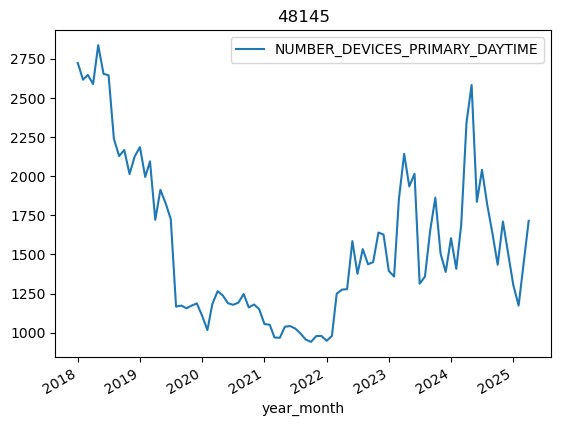

In [22]:
import random

random_county = county_panel_df.sample(n=1)['county_FIPS']
df = county_panel_df.query(f"county_FIPS == '{random_county.values[0]}'").copy()
df['year_month'] = pd.to_datetime(df['year_month'])
df.plot(x='year_month', y='NUMBER_DEVICES_PRIMARY_DAYTIME', title=random_county.values[0])

# Adjust negetive population

In [1]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
import calendar
from tqdm.notebook import tqdm
from tqdm import tqdm
tqdm.pandas()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

In [2]:
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo

save_file = False

year = '2022'
month = 11  # 2022-08 missed

stops_per_device = 2 # stops per device per day

_, num_days = calendar.monthrange(int(year), month)
print(f"Days in {year}-{month:02d}:", num_days)


#  #### Dell desktop
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor'   
# data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'    # Dell
# ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# ##  home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# home_panel_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
# CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"
# landscan_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\Landscan_daytime_2021_CBG.csv"
# hourly_popu_fname = fr"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"

# home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The`1

# data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Dell 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Dell
# ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Lenovo
# ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv"
# CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"

# # 2018 desktop
save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor'   
# save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel'  # 2018 desktop
data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'    # 2018
# # data_dir = r'D:\SafeGraph\Advan_2024_API\Neighborhood_Patterns'    
ACS_file = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# # home_panel_fname = f"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
# # # https://community.deweydata.io/t/residing-device-count-in-2023-07-and-2023-08-surged-abnomorally/26675/15
CBG_2019_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"
landscan_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test\Landscan_daytime_2021_CBG.csv"
hourly_popu_fname = fr"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\CBG_population_hourly_{year}{month:02}.csv"



# Dell
# 
# 2018 desktop
# 

os.makedirs(save_dir, exist_ok=True)

month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
no_dict_colum_fname = os.path.join(save_dir, f"NP_dict_column_{year}_{month:02}.csv")
device_home_areas_fname = os.path.join(save_dir, f"NP_split_device_home_areas_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_CBG_fname     = os.path.join(save_dir, f"adjusted_dwelling_time_stop_CBG_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_natinol_fname = os.path.join(save_dir, f"adjusted_dwelling_time_stop_natinol_{year}_{month:02}.csv")
person_per_device_fname = os.path.join(save_dir, f"person_per_device_{year}_{month:02}.csv")
restored_CBG_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_CBG_{year}_{month:02}.csv")
restored_target_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_target_{year}_{month:02}.csv")
CBG_device_stop_destination_distribution_fname  = os.path.join(save_dir, f"CBG_device_stop_destination_distribution_{year}_{month:02}.csv")
CBG_device_stop_origin_distribution_fname = os.path.join(save_dir, f"CBG_device_stop_origin_distribution_{year}_{month:02}.csv")
IPF_results_fname = os.path.join(save_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
CBG_hourly_population_fname = os.path.join(save_dir, f"CBG_population_hourly_{year}{month:02}.csv")

CBG_origin_outbound_distribution_sampling_rate_fname = os.path.join(save_dir, f"CBG_origin_outbound_distribution_sampling_rate_{year}{month:02}.csv")
CBG_destination_inbound_per_device_fname = os.path.join(save_dir, f"CBG_destination_inbound_per_device_{year}{month:02}.csv")

CBG_destination_inbound_fname = os.path.join(save_dir, f"CBG_destination_inbound_{year}{month:02}.csv")
inbound_hourly_df_fname = os.path.join(save_dir, f"inbound_hourly_{year}{month:02}.csv")
CBG_agregated_inbound_fname =  os.path.join(save_dir, f"CBG_agregated_inbound_{year}{month:02}.csv")
hourly_agregated_inbound_fname =  os.path.join(save_dir, f"hourly_agregated_inbound_{year}{month:02}.csv")

 
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
# CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

# sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'

  
print("Month directory:", month_dir)
print("Save_dir directory:", save_dir)
print("ACS_file:", ACS_file)
print("home_panel file name:", home_panel_fname)

print("No dict colum file name:", no_dict_colum_fname)
print("Device home areas file name:", device_home_areas_fname)
print("Device person_per_device file name:", person_per_device_fname)


print("Device adjusted_dwelling_time_stop_CBG_fname:", adjusted_dwelling_time_stop_CBG_fname)
print("Device adjusted_dwelling_time_stop_natinol_fname:", adjusted_dwelling_time_stop_natinol_fname)

print("Restored_hourly_vistor_count_CBG file name:   ", restored_CBG_hourly_vistor_count_fname)
print("Restored_hourly_vistor_count_target file name:", restored_target_hourly_vistor_count_fname)

print("CBG_device_stop_destination_distribution file name:   ", CBG_device_stop_destination_distribution_fname)
print("CBG_device_stop_origin_distribution file name:", CBG_device_stop_origin_distribution_fname)

print("IPF_results file name:", IPF_results_fname)
print("CBG hourly population file name:", CBG_hourly_population_fname)

print("CBG_origin_outbound_distribution_sampling_rate file name:", CBG_origin_outbound_distribution_sampling_rate_fname)


Days in 2022-11: 30
Month directory: D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2022\11\01
Save_dir directory: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor
ACS_file: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv
home_panel file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz
No dict colum file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\NP_dict_column_2022_11.csv
Device home areas file name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\NP_split_device_home_areas_2022_11.csv
Device person_per_device file name: E:\On

In [3]:
ACS_df = pd.read_csv(ACS_file, dtype={'fips':np.int64}).iloc[:, :2].rename(columns={"fips": "CBG"}).set_index("CBG")
ACS_df

,totalpopulation
CBG,
10010201001,730
10010201002,1263
10010202001,835
10010202002,1124
10010203001,2774
...,...
721537506011,883
721537506012,2523
721537506013,991


In [4]:
device_home_areas_df = pd.read_csv(device_home_areas_fname, dtype={"origin":str, "destination":str})
device_home_areas_df = device_home_areas_df.query("origin != destination")
# device_home_areas_df = pd.to_numeric(device_home_areas_df.index, errors='coerce').dropna()
device_home_areas_df

,origin,destination,device,stop
0,010010205002,010010201001,193.0,816.0
1,010010208021,010010201001,175.0,739.0
2,010010208022,010010201001,156.0,662.0
3,010010206001,010010201001,146.0,617.0
4,010010208012,010010201001,129.0,544.0
...,...,...,...,...
80221494,780309611002,780309900000,12.0,66.0
80221495,780309608001,780309900000,12.0,66.0
80221496,780309601001,780309900000,12.0,66.0
80221497,780209502003,780309900000,12.0,66.0


In [5]:
mask = device_home_areas_df['origin'].str.contains("CA")
device_home_areas_df = device_home_areas_df[~mask]
mask = device_home_areas_df['destination'].str.contains("CA")
device_home_areas_df = device_home_areas_df[~mask]
device_home_areas_df

,origin,destination,device,stop
0,010010205002,010010201001,193.0,816.0
1,010010208021,010010201001,175.0,739.0
2,010010208022,010010201001,156.0,662.0
3,010010206001,010010201001,146.0,617.0
4,010010208012,010010201001,129.0,544.0
...,...,...,...,...
80221494,780309611002,780309900000,12.0,66.0
80221495,780309608001,780309900000,12.0,66.0
80221496,780309601001,780309900000,12.0,66.0
80221497,780209502003,780309900000,12.0,66.0


In [6]:
device_home_areas_df['destination'] = device_home_areas_df['destination'].astype(np.int64)
device_home_areas_df['origin'] = device_home_areas_df['origin'].astype(np.int64)
device_home_areas_df

,origin,destination,device,stop
0,10010205002,10010201001,193.0,816.0
1,10010208021,10010201001,175.0,739.0
2,10010208022,10010201001,156.0,662.0
3,10010206001,10010201001,146.0,617.0
4,10010208012,10010201001,129.0,544.0
...,...,...,...,...
80221494,780309611002,780309900000,12.0,66.0
80221495,780309608001,780309900000,12.0,66.0
80221496,780309601001,780309900000,12.0,66.0
80221497,780209502003,780309900000,12.0,66.0


<AxesSubplot: >

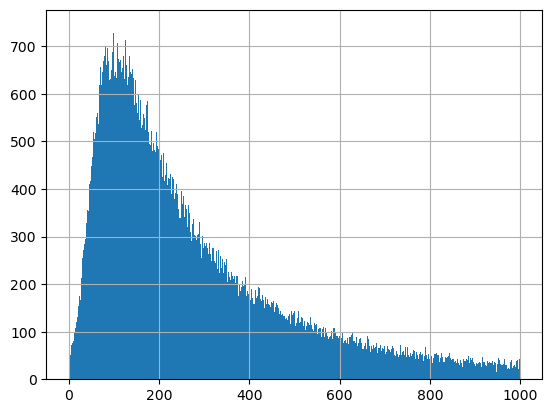

In [7]:
device_home_areas_df.groupby(['destination'])['origin'].count().hist(bins=list(range(1000)))

<AxesSubplot: >

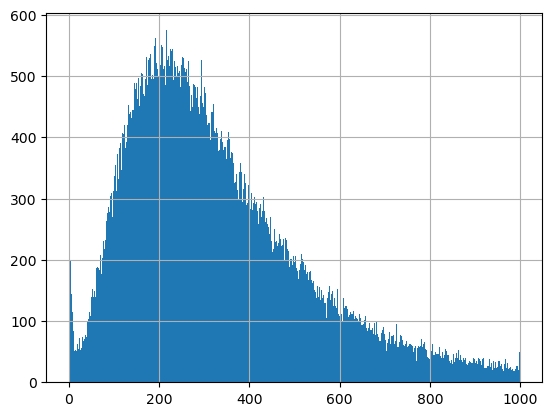

In [8]:
device_home_areas_df.groupby(['origin'])['destination'].count().hist(bins=list(range(1000)))

In [9]:
print("The inter CBG device (outside home) flow ratio:")
device_home_areas_df.query("origin != destination")['device'].sum() / device_home_areas_df['device'].sum() 

The inter CBG device (outside home) flow ratio:


1.0

In [10]:
print("The inter CBG stop (outside home) flow ratio:")
device_home_areas_df.query("origin != destination")['stop'].sum() / device_home_areas_df['stop'].sum() 

The inter CBG stop (outside home) flow ratio:


1.0

In [11]:
hourly_popu_df = pd.read_csv(hourly_popu_fname, dtype={'CBG':np.int64})
hourly_popu_df = hourly_popu_df.set_index('CBG')#.astype(int)
hourly_popu_df

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

In [12]:
print("Negative cell ratio before adjustment:")
(hourly_popu_df<0).sum().sum() / (hourly_popu_df.shape[0] * hourly_popu_df.shape[1])#.min(axis=1)  # too many negtive values

Negative cell ratio before adjustment:


0.13928700114025086

In [13]:
# inbound_df = pd.read_csv(inbound_hourly_df_fname, dtype={"CBG":str}).set_index('CBG').astype(int)
# inbound_df

In [14]:
# outbound_df.loc[:, :]
# hourly_popu_df + inbound_df - outbound_df

In [15]:
outbound_df = pd.read_csv(IPF_results_fname, dtype={"CBG":np.int64}).set_index('CBG')#.astype(int)
outbound_df = outbound_df.loc[:, ~outbound_df.columns.str.contains('^Unnamed')]
outbound_df

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

In [16]:
# dest_dict = {o:df for o, df in tqdm(device_home_areas_df.groupby("destination"))}    # .set_index('origin') 
ori_dict = {o:df.set_index('destination') for o, df in tqdm(device_home_areas_df.groupby("origin"))}                # .set_index('destination')
# dest_dict

100%|████████████████████████████████████████████████████████████████████████| 218722/218722 [01:03<00:00, 3453.17it/s]


In [17]:
# ori_dict
# len(dest_dict), len(ori_dict)
len(ori_dict)

218722

In [18]:
# device_home_areas_df['origin'] = device_home_areas_df['origin'].str.replace("CA:", "") 
# device_home_areas_df['destination'] = device_home_areas_df['destination'].str.replace("CA:", "") 

# device_home_areas_df
# ori_dict[CBG]

In [19]:
# %%time
# do not save time than dataframe
# row_indices = np.where(hourlpy_popu_arr[:, 0] == CBG)[0]
# hourlpy_popu_arr[row_indices]

In [20]:
# mask = device_home_areas_df['origin'].str.contains("CA:") 
# device_home_areas_df = device_home_areas_df[mask]
# mask = device_home_areas_df['origin'].str.contains("CA:") 
# device_home_areas_df = device_home_areas_df[mask]
# device_home_areas_df

In [21]:
# CBG

In [22]:
# tt = device_home_areas_df.set_index("origin")

In [23]:

# %%time
# tt.loc[CBG]

In [24]:
# contains_ca = lambda x: "CA:" in x

# # contains_ca = lambda x: "CA" in x

# # Apply the function to each cell and sum results per row to identify rows to drop
# rows_to_drop = device_home_areas_df.applymap(contains_ca).sum(axis=1) > 0

# # Drop the rows where any cell contains "CA"
# df_filtered = df.drop(rows_to_drop[rows_to_drop].index)

# print(df_filtered)

In [25]:
# print(len(rows))
# # print()

# hourlpy_popu_arr = device_home_areas_df.replace("CA:", "").to_numpy(np.int64)
 
# hourlpy_popu_arr

In [26]:
# # hourlpy_popu_arr.where()
# row_indices = np.where(hourlpy_popu_arr[:, 0] == CBG)[0]
# row_indices

In [27]:
# device_home_areas_origin_df = device_home_areas_df.set_index('origin')
# device_home_areas_origin_df

In [28]:
# device_home_areas_origin_df.loc[CBG]

In [29]:
# monthly_out_dist_df = device_home_areas_df.query(f"origin == '{CBG}' ")#.set_index('destination')
# monthly_out_dist_df

In [30]:
# hourlpy_popu_arr.shape
# monthly_out_dist_df = device_home_areas_df.query(f"origin == '{CBG}' ")#.set_index('destination')
# monthly_out_dist_df

In [31]:
# len(rows)
total_cell_cnt = hourly_popu_df.shape[0] * hourly_popu_df.shape[1]
rows, cols = np.where(hourly_popu_df < 0)
total_cell_cnt, len(rows), len(cols) / total_cell_cnt

(157860000, 21987846, 0.13928700114025086)

In [32]:
# hourly_popu_df.abs().sum().sum() / 744

# ori_dict[CBG]

In [33]:
# monthly_out_dist_df
# hourly_popu_df
hourly_popu_df#.shape

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

In [34]:
pd.options.mode.chained_assignment = None

## remove negative

In [35]:
# hourly_popu_df
# # CBG_to_row_dict
# CBG
# column_name

In [36]:
# hourly_popu_df[column_name].sum(), hourly_popu_df.iloc[:, col].sum()

# rows[200:]

In [37]:
# # %%time

# def remove_negetive_population():
#     # negative population
#     rows, cols = np.where(hourly_popu_df < 0)

#     min_ratio = 0.1 # minimum population in a CBG

#     new_hourly_popu_df = hourly_popu_df.copy()

#     new_hourly_popu_arr = hourly_popu_df.copy().to_numpy().astype(float)

#     hourly_popu_df['row'] = hourly_popu_df.reset_index().index
#     CBG_to_row_dict = hourly_popu_df['row'].to_dict()

#     processed_cnt = 0
    
#     skip_pos = 0

#     CBG0 = ""
#     for row, col in tqdm(zip(rows[skip_pos:], cols[skip_pos:])):
#     # for row, col in zip(rows, cols):
#         try:
#             CBG = new_hourly_popu_df.index[row]
#             hourly_popu = new_hourly_popu_df.iloc[row, col]

#             column_name = new_hourly_popu_df.columns[col]

#             if CBG != CBG0:   # a new CBG
#                 ACS_popu = ACS_df.loc[CBG]['totalpopulation']

#                 # origin from this CBG
#                 # monthly_out_dist_df = device_home_areas_df.query(f"origin == '{CBG}' ").set_index('destination')   # get the month distribution  .rename(columns={'destination': "CBG"})
#                 monthly_out_dist_df =  ori_dict[CBG].sort_values('stop').iloc[:]#.set_index('destination')
#                 # monthly_out_dist_df = monthly_out_dist_df
                
#                 monthly_out_dist_df = monthly_out_dist_df.merge(hourly_popu_df[['row']].reset_index(), left_on="destination", right_on="CBG")
#                 monthly_out_dist_df['stop_weight'] = monthly_out_dist_df['stop'] / monthly_out_dist_df['stop'].sum()

#                # to this CBG
#                 # monthly_in_dist_df = device_home_areas_df.query(f"destination == '{CBG}' ").set_index('origin')  # .rename(columns={'origin': "CBG"})
#                 # monthly_in_dist_df =  dest_dict[CBG]#.set_index('origin')
#                 # monthly_in_dist_df['stop_weight'] = monthly_in_dist_df['stop'] / monthly_in_dist_df['stop'].sum()


#                 # monthly_out_dist_df['stop_weight'] = 0

#                 CBG0 = CBG



#             outbound = outbound_df.loc[CBG][col]
#             # inbound  =  inbound_df.loc[CBG][col]    

#             min_popu = min_ratio * ACS_popu

#             diff_popu = min_popu - hourly_popu

#             # adj_inbound = diff_popu * 0.5 
#             # adj_outbound =  diff_popu * 0.5 

#             # adj_inbound = diff_popu *  (inbound) / (outbound + inbound)
#             # adj_outbound =  diff_popu *  (outbound) / (outbound + inbound)
#             adj_outbound =  diff_popu  # *  (outbound) / (outbound + inbound)


#             # monthly_in_dist_df['adj_popu'] =   adj_inbound  * monthly_in_dist_df['stop_weight'] 
#             monthly_out_dist_df['adj_popu'] = adj_outbound  * monthly_out_dist_df['stop_weight'] 


#             # most time comsuming
#             # new_hourly_popu_df.loc[monthly_out_dist_df.index[:2], column_name]  -=  monthly_out_dist_df['adj_popu'].iloc[:2].values #.to_list()  # .rename(columns={'origin': "CBG"}).set_index('CBG')
#             # new_hourly_popu_df.loc[monthly_in_dist_df.index, column_name]   =  new_hourly_popu_df.loc[monthly_in_dist_df.index,  column_name] - monthly_in_dist_df['adj_popu']
#             # t = 0
#         #     for i, r in monthly_out_dist_df.iloc[:].iterrows():
#         #         try:
#         #             row_num = CBG_to_row_dict[r['destination']]

#         #             # print(i, col, r['stop'], r['adj_popu'], new_hourly_popu_df.iloc[i, col])
#         #             # new_hourly_popu_df.iat[row_num, col] -= r['adj_popu'] 
#         #             new_hourly_popu_arr[row_num, col]  -= r['adj_popu'] 

#         #             t += r['adj_popu']
#         #         except Exception as e:
#         #             print(f"Error: {e}\n", i, r)
#                     # pass

#             new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col] -= monthly_out_dist_df['adj_popu'].to_numpy()   # too slow! 100 cells needs 7 seconds!

#             # new_hourly_popu_df.loc[monthly_out_dist_df['destination'], column_name] -= monthly_out_dist_df['adj_popu']   # too slow! 100 cells needs 7 seconds!

#             new_hourly_popu_arr[row, col] = min_popu  # increased by diff_popu
            
#             differece = new_hourly_popu_arr[:, col].sum() - hourly_popu_df.iloc[:, col].sum()


#             processed_cnt += 1

#             def _print_info():
#                 print(f"row: {row}, col: {col}   {processed_cnt} / {len(rows)}, {100 *processed_cnt / len(rows) : .2f}%")
#                 print("min_popu:", min_popu)
#                 print("diff_popu, adj_popu:", diff_popu, monthly_out_dist_df['adj_popu'].sum())
#                 print("Current population:", hourly_popu, row, col, new_hourly_popu_df.index[row])
#                 print(f"Before: {hourly_popu_df.iloc[:, col].sum()},  after: {new_hourly_popu_arr[:, col].sum()}, differece: {differece}")
                
#             # if processed_cnt % 60000 == 0:
#             #     _print_info()
                
#             if processed_cnt == 296:
#             # if differece > 10:
#                 _print_info()
#                 break

#                 # break
#         except Exception as e:
#             print(e)
#             continue



# # new_hourly_popu_df
# # t

# # remove_negetive_population()
# # remove_negetive_population()
# # remove_negetive_population()

Note: The second row has bug!

In [38]:
# rows, cols = np.where(hourly_popu_df < 0)

# min_ratio = 0.1 # minimum population in a CBG

# new_hourly_popu_df = hourly_popu_df.copy()

# new_hourly_popu_arr = hourly_popu_df.copy().to_numpy().astype(float)

# hourly_popu_df['row'] = hourly_popu_df.reset_index().index
# # CBG_to_row_dict = hourly_popu_df['row'].to_dict()

# processed_cnt = 0

# skip_pos = 0

# CBG0 = ""
# for row, col in tqdm(zip(rows[skip_pos:], cols[skip_pos:])):
# # for row, col in zip(rows, cols):
#     try:
#         CBG = new_hourly_popu_df.index[row]
#         hourly_popu = new_hourly_popu_df.iloc[row, col]

#         column_name = new_hourly_popu_df.columns[col]

#         if CBG != CBG0:   # a new CBG
#             ACS_popu = ACS_df.loc[CBG]['totalpopulation']

#             # origin from this CBG
#             # monthly_out_dist_df =  ori_dict[CBG].sort_values('stop').iloc[:] 
#             monthly_out_dist_df =  ori_dict[CBG] # extract the destination CBGs

#             monthly_out_dist_df = monthly_out_dist_df.merge(hourly_popu_df[hourly_popu_df.iloc[:, col]>0][['row']], left_on="destination", right_on="CBG")  # add the 'row' column
#             monthly_out_dist_df['stop_weight'] = monthly_out_dist_df['stop'] / monthly_out_dist_df['stop'].sum()  # compute the weight
            
#             # Note: the negative cells in that column will NOT involve the weight! 

#            # to this CBG
#             # monthly_in_dist_df = device_home_areas_df.query(f"destination == '{CBG}' ").set_index('origin')  # .rename(columns={'origin': "CBG"})
#             # monthly_in_dist_df =  dest_dict[CBG]#.set_index('origin')
#             # monthly_in_dist_df['stop_weight'] = monthly_in_dist_df['stop'] / monthly_in_dist_df['stop'].sum()


#             # monthly_out_dist_df['stop_weight'] = 0

#             CBG0 = CBG
 
#         outbound = outbound_df.loc[CBG][col]
#         # inbound  =  inbound_df.loc[CBG][col]    

#         min_popu = min_ratio * ACS_popu

#         diff_popu = min_popu - hourly_popu

#         # adj_inbound = diff_popu * 0.5 
#         # adj_outbound =  diff_popu * 0.5 

#         # adj_inbound = diff_popu *  (inbound) / (outbound + inbound)
#         # adj_outbound =  diff_popu *  (outbound) / (outbound + inbound)
#         adj_outbound =  diff_popu  # *  (outbound) / (outbound + inbound)


#         # monthly_in_dist_df['adj_popu'] =   adj_inbound  * monthly_in_dist_df['stop_weight'] 
#         monthly_out_dist_df['adj_popu'] = adj_outbound  * monthly_out_dist_df['stop_weight'] 


#         # most time comsuming
#         # new_hourly_popu_df.loc[monthly_out_dist_df.index[:2], column_name]  -=  monthly_out_dist_df['adj_popu'].iloc[:2].values #.to_list()  # .rename(columns={'origin': "CBG"}).set_index('CBG')
#         # new_hourly_popu_df.loc[monthly_in_dist_df.index, column_name]   =  new_hourly_popu_df.loc[monthly_in_dist_df.index,  column_name] - monthly_in_dist_df['adj_popu']
#         # t = 0
#     #     for i, r in monthly_out_dist_df.iloc[:].iterrows():
#     #         try:
#     #             row_num = CBG_to_row_dict[r['destination']]

#     #             # print(i, col, r['stop'], r['adj_popu'], new_hourly_popu_df.iloc[i, col])
#     #             # new_hourly_popu_df.iat[row_num, col] -= r['adj_popu'] 
#     #             new_hourly_popu_arr[row_num, col]  -= r['adj_popu'] 

#     #             t += r['adj_popu']
#     #         except Exception as e:
#     #             print(f"Error: {e}\n", i, r)
#                 # pass

#         # new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col] -= monthly_out_dist_df['adj_popu'].to_numpy()    # Note: The second row has bug!
#         new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col] = hourly_popu_df.iloc[monthly_out_dist_df['row'].to_numpy(), col].to_numpy() - monthly_out_dist_df['adj_popu'].to_numpy()   # this is correct!

#         new_hourly_popu_arr[row, col] = min_popu  # increased by diff_popu

#         differece = new_hourly_popu_arr[:, col].sum() - hourly_popu_df.iloc[:, col].sum()


#         processed_cnt += 1

#         def _print_info():
#             print(f"row: {row}, col: {col}   {processed_cnt} / {len(rows)}, {100 *processed_cnt / len(rows) : .2f}%")
#             print("min_popu:", min_popu)
#             print("diff_popu, adj_popu:", diff_popu, monthly_out_dist_df['adj_popu'].sum())
#             print("Current population at CBG:", hourly_popu,  new_hourly_popu_df.index[row])
#             print(f"Before: {hourly_popu_df.iloc[:, col].sum()},  after: {new_hourly_popu_arr[:, col].sum()}, differece: {differece}")
            
#             print(f"ori_dict[CBG] len: {ori_dict[CBG].shape}, monthly_out_dist_df len: {monthly_out_dist_df.shape}, new_hourly_popu_arr[] len:{new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col].shape}, hourly_popu_df[] len: {hourly_popu_df.iloc[monthly_out_dist_df['row']].shape}",)

#         # if processed_cnt % 6000 == 0:
#         #     _print_info()

#         # if processed_cnt == 1:
#         if differece > 0.0001:
#             _print_info()
#             break

#             # break
#     except Exception as e:
#         print(e)
#         continue

# # Note to rebuild by column:
# # 1. set the negetive cell to 10% ACS population.
# # 2. Set other 90% population to the destination CBGs according to the monthly distribution.


## re-distribute the destination

In [39]:
# hourly_popu_df
# hourly_popu_df[hourly_popu_df.iloc[:, col]>0][['row']]

In [40]:
# rows, cols = np.where(hourly_popu_df < 0)

# min_ratio = 0.1 # minimum population in a CBG

# new_hourly_popu_df = hourly_popu_df.copy()

# new_hourly_popu_arr = hourly_popu_df.copy().to_numpy().astype(float)

# hourly_popu_df['row'] = hourly_popu_df.reset_index().index
# # CBG_to_row_dict = hourly_popu_df['row'].to_dict()

# processed_cnt = 0

# skip_pos = 0

# CBG0 = ""


# for row, col in tqdm(zip(rows[skip_pos:], cols[skip_pos:])):
# # for row, col in zip(rows, cols):
#     try:
#         CBG = new_hourly_popu_df.index[row]
#         hourly_popu = new_hourly_popu_df.iloc[row, col]

#         column_name = new_hourly_popu_df.columns[col]

#         if CBG != CBG0:   # a new CBG
#             ACS_popu = ACS_df.loc[CBG]['totalpopulation']

#             # origin from this CBG
#             # monthly_out_dist_df =  ori_dict[CBG].sort_values('stop').iloc[:] 
#             monthly_out_dist_df0 =  ori_dict[CBG] # extract the destination CBGs
            
#             CBG0 = CBG
            
#             # print("monthly_out_dist_df shape:", monthly_out_dist_df.shape)

#         monthly_out_dist_df = monthly_out_dist_df0.merge(hourly_popu_df[hourly_popu_df.iloc[:, col]>0][['row']], left_on="destination", right_on="CBG")  # add the 'row' column
#         # monthly_out_dist_df = hourly_popu_df[hourly_popu_df.iloc[:, col]>0][['row']].merge(monthly_out_dist_df0, left_on="CBG", right_on="destination")  # no speed up effect
  

#         # Perform merge
#         # monthly_out_dist_df = pd.merge(monthly_out_dist_df0, hourly_popu_df[hourly_popu_df.iloc[:, col]>0][['row']],   left_on='destination', right_on="CBG")
        
 

#         # Assuming monthly_out_dist_df0 and hourly_popu_df are predefined pandas DataFrames
#         # and 'col' is the predefined column index for the filtering condition.

 


#         # Rename columns if necessary
#         # monthly_out_dist_df.rename(columns={'row': 'new_row'}, inplace=True)

#         # print("monthly_out_dist_df shape:", monthly_out_dist_df.shape)

#         monthly_out_dist_df['stop_weight'] = monthly_out_dist_df['stop'] / monthly_out_dist_df['stop'].sum()  # compute the weight
            
# #             # print("monthly_out_dist_df shape:", monthly_out_dist_df.shape)
# #             # print()
            
            
            
# #             # Note: the negative cells in that column will NOT involve the weight! 

# #            # to this CBG
# #             # monthly_in_dist_df = device_home_areas_df.query(f"destination == '{CBG}' ").set_index('origin')  # .rename(columns={'origin': "CBG"})
# #             # monthly_in_dist_df =  dest_dict[CBG]#.set_index('origin')
# #             # monthly_in_dist_df['stop_weight'] = monthly_in_dist_df['stop'] / monthly_in_dist_df['stop'].sum()


# #             # monthly_out_dist_df['stop_weight'] = 0

            
 
#         outbound = outbound_df.loc[CBG][col]
#         # inbound  =  inbound_df.loc[CBG][col]    

#         min_popu = min_ratio * ACS_popu

#         diff_popu = min_popu - hourly_popu

#         # adj_inbound = diff_popu * 0.5 
#         # adj_outbound =  diff_popu * 0.5 

#         # adj_inbound = diff_popu *  (inbound) / (outbound + inbound)
#         # adj_outbound =  diff_popu *  (outbound) / (outbound + inbound)
#         adj_outbound =  diff_popu  # *  (outbound) / (outbound + inbound)


#         # monthly_in_dist_df['adj_popu'] =   adj_inbound  * monthly_in_dist_df['stop_weight'] 
#         monthly_out_dist_df['adj_popu'] = adj_outbound  * monthly_out_dist_df['stop_weight'] 


#         # most time comsuming
#         # new_hourly_popu_df.loc[monthly_out_dist_df.index[:2], column_name]  -=  monthly_out_dist_df['adj_popu'].iloc[:2].values #.to_list()  # .rename(columns={'origin': "CBG"}).set_index('CBG')
#         # new_hourly_popu_df.loc[monthly_in_dist_df.index, column_name]   =  new_hourly_popu_df.loc[monthly_in_dist_df.index,  column_name] - monthly_in_dist_df['adj_popu']
#         # t = 0
#     #     for i, r in monthly_out_dist_df.iloc[:].iterrows():
#     #         try:
#     #             row_num = CBG_to_row_dict[r['destination']]

#     #             # print(i, col, r['stop'], r['adj_popu'], new_hourly_popu_df.iloc[i, col])
#     #             # new_hourly_popu_df.iat[row_num, col] -= r['adj_popu'] 
#     #             new_hourly_popu_arr[row_num, col]  -= r['adj_popu'] 

#     #             t += r['adj_popu']
#     #         except Exception as e:
#     #             print(f"Error: {e}\n", i, r)
#                 # pass

#         # new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col] -= monthly_out_dist_df['adj_popu'].to_numpy()    # Note: The second row has bug!
#         # new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col] = hourly_popu_df.iloc[monthly_out_dist_df['row'].to_numpy(), col].to_numpy() - monthly_out_dist_df['adj_popu'].to_numpy()   # this is correct!
#         new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col] = new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col]  - monthly_out_dist_df['adj_popu'].to_numpy()   # this is correct!

#         new_hourly_popu_arr[row, col] = min_popu  # increased by diff_popu

#         differece = new_hourly_popu_arr[:, col].sum() - hourly_popu_df.iloc[:, col].sum()


#         processed_cnt += 1

#         def _print_info():
#             print(f"row: {row}, col: {col}   {processed_cnt} / {len(rows)}, {100 *processed_cnt / len(rows) : .2f}%")
#             print("min_popu:", min_popu)
#             print("diff_popu, adj_popu:", diff_popu, monthly_out_dist_df['adj_popu'].sum())
#             print("Current population at CBG:", hourly_popu,  new_hourly_popu_df.index[row])
#             print(f"Before: {hourly_popu_df.iloc[:, col].sum()},  after: {new_hourly_popu_arr[:, col].sum()}, differece: {differece}")
#             print()
#             print(f"ori_dict[CBG] len: {ori_dict[CBG].shape}, monthly_out_dist_df len: {monthly_out_dist_df.shape}, new_hourly_popu_arr[] len:{new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col].shape}, hourly_popu_df[] len: {hourly_popu_df.iloc[monthly_out_dist_df['row']].shape}",)

#         # if processed_cnt % 6000 == 0:
#         #     _print_info()

#         # if processed_cnt == 9:
#         if differece > 0.0001:
#             _print_info()
#             # break

#             # break
#     except Exception as e:
#         print(e)
#         continue

# # Note to rebuild by column:
# # 1. set the negetive cell to 10% ACS population.
# # 2. Set other 90% population to the destination CBGs according to the monthly distribution.


In [41]:
# hourly_popu_df

In [42]:
postives_CBG_popu_df_dict = {}

hourly_popu_df['row'] = hourly_popu_df.reset_index().index

# hourly_popu_df['row'] = hourly_popu_df['row'].astype(np.int64)

for idx, col in tqdm(enumerate(hourly_popu_df.columns)):
    if "hour_" in col:
        mask = hourly_popu_df[col] > 0
        # mask = new_hourly_popu_arr[:, idx] > 0
        postives_CBG_popu_df_dict[idx] = hourly_popu_df[mask][[col, 'row']].copy()
        # postives_CBG_popu_df_dict[idx] = new_hourly_popu_arr[mask] # slower
        
## Note: .iloc seems super slow! 4 item / second        
# postives_CBG_popu_df_dict

721it [03:57,  3.03it/s]


In [43]:
# hourly_popu_df[mask].iloc[:, idx]
# postives_CBG_popu_df_dict

# new_hourly_popu_arr.shape
# new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col]
# monthly_out_dist_df['row'].to_numpy()
# hourly_popu_df['row'] 
# new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col]
# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(int), col]

# hourly_popu_df[col].sum()

In [44]:
min_ratio = 0.1 # minimum population in a CBG

# new_hourly_popu_df = hourly_popu_df.copy()

new_hourly_popu_arr = hourly_popu_df.copy().to_numpy()#.astype(float)

hourly_popu_df['row'] = hourly_popu_df.reset_index().index
hourly_popu_df['row'] = hourly_popu_df['row'].astype(np.int64)
# CBG_to_row_dict = hourly_popu_df['row'].to_dict()

processed_cnt = 0

skip_pos = 0 # 507130   # 506699 + 276

CBG0 = ""

skip_cells = []


for row, col in tqdm(zip(rows[skip_pos:], cols[skip_pos:])):
# for row, col in zip(rows, cols):
    processed_cnt += 1
    differece = 0
    try:
        CBG = hourly_popu_df.index[row]
        # if CBG == r'20130001001':            
        #     continue
        # if CBG == r'20130001002':
        #     continue
        
        if CBG != CBG0:   # a new CBG
        
            try:
                outbound = outbound_df.loc[CBG][col]
            except Exception as e:
                # print("Error in outbound = outbound_df.loc[CBG][col]. ", e)
                # print(f"row: {row}, col: {col}   {processed_cnt} / {len(rows)}, {100 *processed_cnt / len(rows) : .2f}%")
                continue


            
            try:        
                ACS_popu = ACS_df.loc[CBG]['totalpopulation']
                monthly_out_dist_df0 =  ori_dict[CBG]#.set_index('destination') # extract the destination CBGs
                CBG0 = CBG
            except Exception as e:
                # print("Error in ACS_df.loc[CBG]['totalpopulation']. ", e)
                continue
                
                
        hourly_popu = hourly_popu_df.iloc[row, col]

        column_name = hourly_popu_df.columns[col]

        
        min_popu = min_ratio * ACS_popu

#         if CBG != CBG0:   # a new CBG
#             ACS_popu = ACS_df.loc[CBG]['totalpopulation']
            
#             CBG0 = CBG

#             # origin from this CBG
#             # monthly_out_dist_df =  ori_dict[CBG].sort_values('stop').iloc[:] 
#             monthly_out_dist_df0 =  ori_dict[CBG].set_index('destination') # extract the destination CBGs
            
        
        
        
        
                        
        # a = (hourly_popu_df[f"hour_{col}"] > 0)            
        positive_CBGs = postives_CBG_popu_df_dict[col][['row']]
        # positive_CBGs.index = positive_CBGs.index.astype('int64')
        # monthly_out_dist_df0.index = monthly_out_dist_df0.index.astype('int64')
        


        # monthly_out_dist_df = monthly_out_dist_df0.merge(positive_CBGs, left_on="destination", right_on="CBG")  # add the 'row' column  left_index=False, right_index=False, 
        # monthly_out_dist_df = monthly_out_dist_df0.merge(positive_CBGs, left_index=True, right_index=True )  # 100 item /second
        monthly_out_dist_df = monthly_out_dist_df0.join(positive_CBGs, how='inner') # .dropna()  #  # 150 item /second
        
        if len(monthly_out_dist_df) == 0:
            # new_hourly_popu_arr[row, col] = min_popu  # increased by diff_p
            skip_cells.append((row, col))
            # print("Skipped row, col, skip_cells:", row, col, skip_cells)
            continue


        monthly_out_dist_df['stop_weight'] = monthly_out_dist_df['stop'] / monthly_out_dist_df['stop'].sum()  # compute the weight

        
        diff_popu = min_popu - hourly_popu

        adj_outbound =  diff_popu  # *  (outbound) / (outbound + inbound)


        monthly_out_dist_df['adj_popu'] = adj_outbound  * monthly_out_dist_df['stop_weight'] 
# 

        new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] = new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col]  - monthly_out_dist_df['adj_popu'].to_numpy()   # this is correct!

  
        
    
        new_hourly_popu_arr[row, col] = min_popu  # increased by diff_p

        differece = new_hourly_popu_arr[:, col].sum() - hourly_popu_df.iloc[:, col].sum()  # Should be the last line
        

        def _print_info():
            try:
                print(f"row: {row}, col: {col}   {processed_cnt} / {len(rows)}, {100 *processed_cnt / len(rows) : .2f}%")
                print("min_popu:", min_popu)
                print("diff_popu, adj_popu:", diff_popu, monthly_out_dist_df['adj_popu'].sum())
                print("Before and after population at CBG:", hourly_popu,  new_hourly_popu_arr[row, col], hourly_popu_df.index[row])
                print(f"Before: {hourly_popu_df.iloc[:, col].sum()},  after: {new_hourly_popu_arr[:, col].sum()}, differece: {differece}")
                # print()
                print(f"ori_dict[CBG] len: {ori_dict[CBG].shape}, monthly_out_dist_df len: {monthly_out_dist_df.shape}, new_hourly_popu_arr[] len:{new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col].shape}, hourly_popu_df[] len: {hourly_popu_df.iloc[monthly_out_dist_df['row']].shape}",)
            except Exception as e:
                print("Error in _print_infor()", e)

        if processed_cnt % 1500000 == 0:
            _print_info()

        # if processed_cnt == 9:
        if abs(differece) > 1:
            print("Large difference!")
            _print_info()
            # break
            
        # if differece < -1:
        #     _print_info()
            # break
            
#         if row > 2:
#             _print_info()
#             break
  
    except Exception as e:
        # print("Error for loop:", e)
        # print(f"row: {row}, col: {col}   {processed_cnt} / {len(rows)}, {100 *processed_cnt / len(rows) : .2f}%")
        # _print_info()
        continue

# Note to rebuild by column:
# 1. set the negetive cell to 10% ACS population.
# 2. Set other 90% population to the destination CBGs according to the monthly distribution.


1500044it [1:30:23, 278.62it/s]

row: 14746, col: 707   1500000 / 21987846,  6.82%
min_popu: 154.8
diff_popu, adj_popu: 1057.8 1057.8
Before and after population at CBG: -903.0 154.8 60371882011
Before: 327388741.0,  after: 327388741.0, differece: 0.0
ori_dict[CBG] len: (348, 3), monthly_out_dist_df len: (322, 6), new_hourly_popu_arr[] len:(322,), hourly_popu_df[] len: (322, 721)


3000032it [2:58:32, 284.25it/s]

row: 28972, col: 329   3000000 / 21987846,  13.64%
min_popu: 143.9
diff_popu, adj_popu: 1622.9 1622.9
Before and after population at CBG: -1479.0 143.9 60770051323
Before: 327242131.0,  after: 327242130.99999994, differece: -5.960464477539063e-08
ori_dict[CBG] len: (202, 3), monthly_out_dist_df len: (155, 6), new_hourly_popu_arr[] len:(155,), hourly_popu_df[] len: (155, 721)


4500045it [4:30:30, 268.00it/s]

row: 45049, col: 496   4500000 / 21987846,  20.47%
min_popu: 252.0
diff_popu, adj_popu: 2882.0 2882.0
Before and after population at CBG: -2630.0 252.0 120710103051
Before: 327242739.0,  after: 327242739.0, differece: 0.0
ori_dict[CBG] len: (797, 3), monthly_out_dist_df len: (575, 6), new_hourly_popu_arr[] len:(575,), hourly_popu_df[] len: (575, 721)


6000041it [6:02:19, 240.60it/s]

row: 61282, col: 329   6000000 / 21987846,  27.29%
min_popu: 181.8
diff_popu, adj_popu: 2283.8 2283.8
Before and after population at CBG: -2102.0 181.8 170316308002
Before: 327242131.0,  after: 327242131.0, differece: 0.0
ori_dict[CBG] len: (641, 3), monthly_out_dist_df len: (420, 6), new_hourly_popu_arr[] len:(420,), hourly_popu_df[] len: (420, 721)


7500041it [7:35:03, 275.82it/s]

row: 73582, col: 687   7500000 / 21987846,  34.11%
min_popu: 104.60000000000001
diff_popu, adj_popu: 1142.6 1142.5999999999995
Before and after population at CBG: -1038.0 104.60000000000001 181759673001
Before: 327254789.0,  after: 327254789.0, differece: 0.0
ori_dict[CBG] len: (260, 3), monthly_out_dist_df len: (223, 6), new_hourly_popu_arr[] len:(223,), hourly_popu_df[] len: (223, 721)


9000029it [9:08:08, 258.57it/s]

row: 88244, col: 13   9000000 / 21987846,  40.93%
min_popu: 86.2
diff_popu, adj_popu: 448.2 448.20000000000016
Before and after population at CBG: -362.0 86.2 240276066034
Before: 327371050.0,  after: 327371050.00000006, differece: 5.960464477539063e-08
ori_dict[CBG] len: (71, 3), monthly_out_dist_df len: (63, 6), new_hourly_popu_arr[] len:(63,), hourly_popu_df[] len: (63, 721)


10500043it [10:40:39, 276.19it/s]

row: 102939, col: 368   10500000 / 21987846,  47.75%
min_popu: 107.9
diff_popu, adj_popu: 808.9 808.8999999999999
Before and after population at CBG: -701.0 107.9 261635683003
Before: 327352521.0,  after: 327352521.0, differece: 0.0
ori_dict[CBG] len: (560, 3), monthly_out_dist_df len: (396, 6), new_hourly_popu_arr[] len:(396,), hourly_popu_df[] len: (396, 721)


12000027it [12:14:59, 265.29it/s]

row: 117672, col: 10   12000000 / 21987846,  54.58%
min_popu: 146.5
diff_popu, adj_popu: 1494.5 1494.5
Before and after population at CBG: -1348.0 146.5 320030049172
Before: 327393898.0,  after: 327393898.0, differece: 0.0
ori_dict[CBG] len: (727, 3), monthly_out_dist_df len: (597, 6), new_hourly_popu_arr[] len:(597,), hourly_popu_df[] len: (597, 721)


13500027it [13:48:07, 273.43it/s]

row: 132542, col: 416   13500000 / 21987846,  61.40%
min_popu: 135.1
diff_popu, adj_popu: 489.1 489.09999999999997
Before and after population at CBG: -354.0 135.1 360470782001
Before: 327433256.0,  after: 327433256.00000006, differece: 5.960464477539063e-08
ori_dict[CBG] len: (538, 3), monthly_out_dist_df len: (464, 6), new_hourly_popu_arr[] len:(464,), hourly_popu_df[] len: (464, 721)


15000030it [15:22:46, 270.46it/s]

row: 147809, col: 7   15000000 / 21987846,  68.22%
min_popu: 248.20000000000002
diff_popu, adj_popu: 2302.2 2302.2
Before and after population at CBG: -2054.0 248.20000000000002 371819609001
Before: 327419292.0,  after: 327419292.0, differece: 0.0
ori_dict[CBG] len: (292, 3), monthly_out_dist_df len: (224, 6), new_hourly_popu_arr[] len:(224,), hourly_popu_df[] len: (224, 721)


16500046it [16:56:43, 264.39it/s]

row: 162616, col: 655   16500000 / 21987846,  75.04%
min_popu: 90.7
diff_popu, adj_popu: 941.7 941.7
Before and after population at CBG: -851.0 90.7 410430308001
Before: 327432127.0,  after: 327432126.99999994, differece: -5.960464477539063e-08
ori_dict[CBG] len: (216, 3), monthly_out_dist_df len: (159, 6), new_hourly_popu_arr[] len:(159,), hourly_popu_df[] len: (159, 721)


18000034it [18:32:42, 271.73it/s]

row: 177700, col: 351   18000000 / 21987846,  81.86%
min_popu: 113.9
diff_popu, adj_popu: 745.9 745.9
Before and after population at CBG: -632.0 113.9 460379527002
Before: 327287019.0,  after: 327287019.0, differece: 0.0
ori_dict[CBG] len: (129, 3), monthly_out_dist_df len: (101, 6), new_hourly_popu_arr[] len:(101,), hourly_popu_df[] len: (101, 721)


19500036it [20:08:50, 236.87it/s]

row: 193000, col: 134   19500000 / 21987846,  88.69%
min_popu: 110.5
diff_popu, adj_popu: 135.5 135.5
Before and after population at CBG: -25.0 110.5 483030009001
Before: 327288769.0,  after: 327288768.99999994, differece: -5.960464477539063e-08
ori_dict[CBG] len: (206, 3), monthly_out_dist_df len: (152, 6), new_hourly_popu_arr[] len:(152,), hourly_popu_df[] len: (152, 721)


21000040it [21:49:31, 249.12it/s]

row: 208497, col: 706   21000000 / 21987846,  95.51%
min_popu: 104.0
diff_popu, adj_popu: 125.0 125.0
Before and after population at CBG: -21.0 104.0 530530631001
Before: 327395121.0,  after: 327395121.00000006, differece: 5.960464477539063e-08
ori_dict[CBG] len: (227, 3), monthly_out_dist_df len: (210, 6), new_hourly_popu_arr[] len:(210,), hourly_popu_df[] len: (210, 721)


21987846it [22:54:07, 266.69it/s]


In [45]:
(hourly_popu_df.iloc[:1, :] > 0).sum().sum()

654

In [46]:
# new_hourly_popu_arr[row, col],  hourly_popu_df.iloc[row, col]

# new_hourly_popu_arr = hourly_popu_df.copy().to_numpy().astype(int)
# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].sum() - monthly_out_dist_df['adj_popu'].to_numpy().sum() - hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col].sum()

In [47]:
(new_hourly_popu_arr[:, ]<0).sum()
# new_hourly_popu_arr

5311773

In [48]:
# new_hourly_popu_arr = hourly_popu_df.copy().to_numpy().astype(int)


# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] = new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col]  - monthly_out_dist_df['adj_popu'].to_numpy() 

# print("before minus:")
# hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col].sum(), hourly_popu_df.iloc[:, col].sum() ,  hourly_popu_df.iloc[:, col].sum() - new_hourly_popu_arr[:, col].sum() 

In [49]:
# hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col].sum() - monthly_out_dist_df['adj_popu'].to_numpy().sum()
# print("monthly_out_dist_df:")
# monthly_out_dist_df['adj_popu'].to_numpy().sum(), monthly_out_dist_df

In [50]:
# print("Before: sum, df")
# hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col].sum(), hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col] 

In [51]:
# new_hourly_popu_arr = hourly_popu_df.copy().to_numpy() 
# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] = new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] - monthly_out_dist_df['adj_popu'].to_numpy() 

# print("After: sum, df")
# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].sum(), new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col]

In [52]:
# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].sum() - hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col].sum()

In [53]:
# ((new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col]  - hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col]) + monthly_out_dist_df['adj_popu'])#.sum()

In [54]:
# monthly_out_dist_df

In [55]:
# new_hourly_popu_arr[:, col].sum() - hourly_popu_df.iloc[:, col].sum()

In [56]:
# hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col] - monthly_out_dist_df['adj_popu'].to_numpy()

In [57]:
# (hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col] - monthly_out_dist_df['adj_popu'].to_numpy()).sum()

In [58]:
# new_hourly_popu_arr = hourly_popu_df.copy().to_numpy().astype(int)

# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] = new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] - monthly_out_dist_df['adj_popu'].to_numpy() 

# print("After minus:")
# print(new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].sum())

# print("difference, adj_popu:")
# difference = hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col].sum() - new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].sum()
# difference, new_hourly_popu_arr[:, col].sum() - hourly_popu_df.iloc[:, col].sum(), adj_outbound, min_popu,  adj_outbound + min_popu, difference - adj_outbound # min_popu


In [59]:
# new_hourly_popu_arr = hourly_popu_df.copy().to_numpy().astype(int)

# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] = new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] - monthly_out_dist_df['adj_popu'].to_numpy() 

# print("After minus:")
# print(new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].sum())

# print("difference:")
# hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col].sum() - new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].sum() # min_popu


In [60]:
# 246

In [61]:
# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].sum() - 1340081.0


In [62]:
# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col]

In [63]:
# hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col]

In [64]:
# positive_CBGs
# monthly_out_dist_df['adj_popu'].to_numpy()#.shape
# hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col].shape, hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col].sum() ,  hourly_popu_df.iloc[monthly_out_dist_df['row'].astype(np.int64), col] 

In [65]:
# monthly_out_dist_df#['row']

In [66]:
# 1339972 - 1340400

In [67]:
# 319 - 428

In [68]:
# new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].shape, new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col].sum()  , new_hourly_popu_arr[monthly_out_dist_df['row'].astype(np.int64), col] 

In [69]:
# positive_CBGs
# monthly_out_dist_df0
# monthly_out_dist_df

In [70]:
# hourly_popu_df
# filtered_hourly_popu_df = hourly_popu_df.iloc[valid_indices][['row']]
# filtered_hourly_popu_df
# monthly_out_dist_df0['destination'] = pd.Categorical(monthly_out_dist_df0['destination'])
# monthly_out_dist_df0
# filtered_hourly_popu_df['CBG'] = pd.Categorical(filtered_hourly_popu_df.index)
# filtered_hourly_popu_df
# monthly_out_dist_df = pd.merge(monthly_out_dist_df0, filtered_hourly_popu_df, how='left', left_on='destination', right_index=True)
# monthly_out_dist_df
# monthly_out_dist_df.rename(columns={'row': 'new_row'}, inplace=True)
# monthly_out_dist_df

In [71]:
# new_hourly_popu_arr.shape
# monthly_out_dist_df['adj_popu'].sum()
# new_hourly_popu_arr[monthly_out_dist_df['row']].sum()
# monthly_out_dist_df


In [72]:
# hourly_popu_df.iloc[0, 33], hourly_popu_df.iloc[1, 33]

In [73]:
# new_hourly_popu_arr[0, 33], new_hourly_popu_arr[1, 33] # become 64.03 after (1, 33), when (0, 33) is 73, -588.65

In [74]:
# hourly_popu_df

In [75]:
# monthly_out_dist_df.merge(hourly_popu_df[hourly_popu_df.iloc[:, col]>0][['row']], left_on="destination", right_on="CBG")

In [76]:
# hourly_popu_df[hourly_popu_df.iloc[:, col]>0][[f'hour_{col}', 'row']]

In [77]:
# monthly_out_dist_df

In [78]:
# for idx, r in monthly_out_dist_df[['row']].iterrows():
#     print(idx, r['row']) 

In [79]:
# rows[291], rows[292], rows[293], rows[294]
    
# processed_cnt = 0
# for row, col in tqdm(zip(rows[skip_pos:], cols[skip_pos:])):
    
    
#     processed_cnt += 1
    
#     print(processed_cnt, row, col)
    
#     if processed_cnt == 293:
#         break

In [80]:
# # monthly_out_dist_df
# hourly_popu_df[hourly_popu_df.iloc[:, col]>0]
# hourly_popu_df[hourly_popu_df.iloc[:, col]>0] 
# monthly_out_dist_df
# new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col]

In [81]:
# np.unique(cols).shape

In [82]:
# rows[cols == 453]

In [83]:
# hourly_popu_df.iloc[monthly_out_dist_df['row'].to_numpy(), col].to_numpy().sum(), new_hourly_popu_arr[row, col] 

In [84]:
# new_hourly_popu_arr[:, col].shape, hourly_popu_df.iloc[:, col].shape
# new_hourly_popu_arr[:, col].sum()

In [85]:
# 650122 - 650060.1
# 
# new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col].sum()

In [86]:
# monthly_out_dist_df['adj_popu'].sum(), monthly_out_dist_df['stop_weight'].sum(), adj_outbound,  monthly_out_dist_df['adj_popu'].sum()

# (hourly_popu_df.iloc[monthly_out_dist_df['row'].to_numpy(), col].to_numpy() - monthly_out_dist_df['adj_popu'].to_numpy()).sum()

In [87]:
# x = np.where(rows > 0)
# x
# rows[5247], rows[5248], rows[5249], cols[5247], cols[5248], cols[5249]
# 
# hourly_popu_df.iloc[monthly_out_dist_df['row'].to_numpy(), col].sum(),  monthly_out_dist_df['adj_popu'].shape, ori_dict[CBG].shape, new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col].sum()
# ori_dict[CBG]
# monthly_out_dist_df

In [88]:
# row: 32, col: 453   5248 / 29386398,  0.02%
# min_popu: 29.900000000000002
# diff_popu, adj_popu: 61.900000000000006 61.90000000000001
# Current population at CBG: -32 010030101001
# Before: 324334124,  after: 324334181.85992247, differece: 57.85992246866226

In [89]:
# monthly_out_dist_df
# ori_dict[CBG].sort_values('stop')
# monthly_out_dist_df
# print("Need to adjust population:", monthly_out_dist_df['adj_popu'].to_numpy().sum())

# (hourly_popu_df.iloc[monthly_out_dist_df['row'].to_numpy(), col].to_numpy() - monthly_out_dist_df['adj_popu'].to_numpy()).sum()

In [90]:
# monthly_out_dist_df

In [91]:
# hourly_popu_df.iloc[monthly_out_dist_df['row'].to_numpy(), col].to_numpy().sum(), monthly_out_dist_df['adj_popu'].to_numpy().sum(), hourly_popu_df.iloc[monthly_out_dist_df['row'].to_numpy(), col].to_numpy().sum() - new_hourly_popu_arr[monthly_out_dist_df['row'].to_numpy(), col].sum()

In [92]:
# row: 1, col: 36   296 / 29386398,  0.00%
# min_popu: 126.30000000000001
# diff_popu, adj_popu: 1318.3 1318.3000000000002
# Current population: -1192 1 36 010010201002
# Before: 324237051,  after: 324237064.848353, differece: 13.848353028297424

In [93]:
# print("Negative cell ratio before adjustment:")
# (hourly_popu_df<0).sum().sum() / (hourly_popu_df.shape[0] * hourly_popu_df.shape[1])#.min(axis=1)  # too many negtive values

In [94]:
# ori_dict[CBG]
# col

In [95]:
# monthly_out_dist_df['stop_weight'].sum(), monthly_out_dist_df['adj_popu'].sum()
# monthly_out_dist_df

In [96]:
# print("Negative cell ratio before adjustment:")
# (hourly_popu_df<0).sum().sum() / (hourly_popu_df.shape[0] * hourly_popu_df.shape[1])#.min(axis=1)  # too many negtive values

## save the results

In [97]:
new_hourly_popu_df = hourly_popu_df.iloc[:, :-1]
new_hourly_popu_df.iloc[:, :] = new_hourly_popu_arr[:, :-1]
new_hourly_popu_df 

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

In [98]:
(new_hourly_popu_arr < 0).sum().sum() /( new_hourly_popu_arr.shape[0] *  new_hourly_popu_arr.shape[1])

0.03360196230688088

In [99]:
new_hourly_popu_df.astype(np.int64).to_csv(fr'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\adjusted_negative_hourly_population\CBG_population_hourly_{year}{month:02}.csv')

<AxesSubplot: >

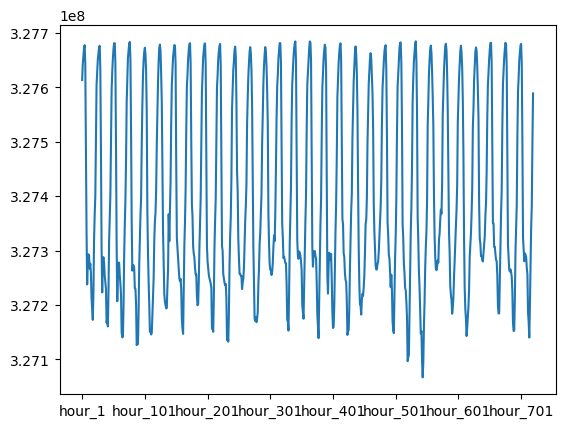

In [100]:
new_hourly_popu_df.astype(np.int64).sum().plot()

## Show the results

In [101]:
hourly_population_map_df = new_hourly_popu_df
hourly_population_map_df

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

In [102]:
ACS_df = pd.read_csv(person_per_device_fname, dtype={"CBG_FIPS":str, "county_FIPS":str})
ACS_df['county_FIPS'] = ACS_df['county_FIPS'].astype(str).str.zfill(5)
ACS_df

,YEAR,MON,REGION,ISO_COUNTRY_CODE,CENSUS_BLOCK_GROUP,NUMBER_DEVICES_RESIDING,NUMBER_DEVICES_PRIMARY_DAYTIME,CBG_FIPS,totalpopulation,sampling_rate,person_per_device,county_FIPS,county_device,county_device_daytime,county_device_population,person_per_device_county
0,2022,11,AL,US,10010201001,67,25.0,010010201001,730,0.018356,54.477612,01001,7406,7406,55380,7.477721
1,2022,11,AL,US,10010201002,184,91.0,010010201002,1263,0.029137,34.320652,01001,7406,7406,55380,7.477721
2,2022,11,AL,US,10010202001,102,55.0,010010202001,835,0.024431,40.931373,01001,7406,7406,55380,7.477721
3,2022,11,AL,US,10010202002,144,69.0,010010202002,1124,0.025623,39.027778,01001,7406,7406,55380,7.477721
4,2022,11,AL,US,10010203001,318,141.0,010010203001,2774,0.022927,43.616352,01001,7406,7406,55380,7.477721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219677,2022,11,PR,US,721537506011,6,3.0,721537506011,883,0.001359,735.833333,72153,627,627,35428,56.503987
219678,2022,11,PR,US,721537506012,31,24.0,721537506012,2523,0.002457,406.935484,72153,627,627,35428,56.503987
219679,2022,11,PR,US,721537506013,21,8.0,721537506013,991,0.004238,235.952381,72153,627,627,35428,56.503987
219680,2022,11,PR,US,721537506021,13,8.0,721537506021,1577,0.001649,606.538462,72153,627,627,35428,56.503987


In [103]:
def get_county_FIPS_dict():
    county_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_county_20m.zip')
    state_gdf = gpd.read_file(r'https://github.com/gladcolor/spatial_data/raw/master/cb_2019_us_state_20m.zip')
    county_gdf = county_gdf.merge(state_gdf[['STATEFP', 'STUSPS', 'NAME']], left_on='STATEFP', right_on='STATEFP', suffixes=['_county', '_state'])
    county_gdf['county_state'] = county_gdf['NAME_county'] + ', ' + county_gdf['STUSPS']
    county_gdf['GEOID'] = county_gdf['GEOID'].astype(str).str.zfill(5)
    county_FIPS_dict = county_gdf.set_index(['county_state'])['GEOID'].to_dict()
    return county_FIPS_dict

county_FIPS_dict = get_county_FIPS_dict()

In [104]:
CBG2019_gdf = gpd.read_file(CBG_2019_fname)
CBG2019_gdf['county_FIPS'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12).str[:5]
CBG2019_gdf['CBG'] = CBG2019_gdf['GEOID'].astype(str).str.zfill(12) 


In [105]:
CBG2019_gdf

,GEOID,geometry,county_FIPS,CBG
0,010730059033,"POLYGON ((-86.69206 33.60022, -86.69174 33.600...",01073,010730059033
1,010730059031,"POLYGON ((-86.68307 33.59456, -86.68297 33.594...",01073,010730059031
2,010730059053,"POLYGON ((-86.70049 33.61777, -86.70047 33.617...",01073,010730059053
3,010730059051,"POLYGON ((-86.71185 33.59383, -86.71176 33.593...",01073,010730059051
4,010730057023,"POLYGON ((-86.88311 33.47224, -86.88307 33.472...",01073,010730057023
...,...,...,...,...
220328,720210302002,"POLYGON ((-66.14085 18.38643, -66.14022 18.389...",72021,720210302002
220329,720210314012,"POLYGON ((-66.16869 18.38156, -66.16750 18.382...",72021,720210314012
220330,720210312021,"POLYGON ((-66.18304 18.38045, -66.18263 18.380...",72021,720210312021
220331,720531504003,"POLYGON ((-65.64082 18.34100, -65.64019 18.341...",72053,720531504003


In [106]:
hour_cnt = hourly_population_map_df.shape[1]
hourly_population_map_df.iloc[:, :hour_cnt ]

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

In [107]:
hourly_population_map_df.index = hourly_population_map_df.index.astype(str).str.zfill(12)
hourly_population_map_df

,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24,hour_25,hour_26,hour_27,hour_28,hour_29,hour_30,hour_31,hour_32,hour_33,hour_34,hour_35,hour_36,hour_37,hour_38,hour_39,hour_40,hour_41,hour_42,hour_43,hour_44,hour_45,hour_46,hour_47,hour_48,hour_49,hour_50,hour_51,hour_52,hour_53,hour_54,hour_55,hour_56,hour_57,hour_58,hour_59,hour_60,hour_61,hour_62,hour_63,hour_64,hour_65,hour_66,hour_67,hour_68,hour_69,hour_70,hour_71,hour_72,hour_73,hour_74,hour_75,hour_76,hour_77,hour_78,hour_79,hour_80,hour_81,hour_82,hour_83,hour_84,hour_85,hour_86,hour_87,hour_88,hour_89,hour_90,hour_91,hour_92,hour_93,hour_94,hour_95,hour_96,hour_97,hour_98,hour_99,hour_100,hour_101,hour_102,hour_103,hour_104,hour_105,hour_106,hour_107,hour_108,hour_109,hour_110,hour_111,hour_112,hour_113,hour_114,hour_115,hour_116,hour_117,hour_118,hour_119,hour_120,hour_121,hour_122,hour_123,hour_124,hour_125,hour_126,hour_127,hour_128,hour_129,hour_130,hour_131,hour_132,hour_133,hour_134,hour_135,hour_136,hour_137,hour_138,hour_139,hour_140,hour_141,hour_142,hour_143,hour_144,hour_145,hour_146,hour_147,hour_148,hour_149,hour_150,hour_151,hour_152,hour_153,hour_154,hour_155,hour_156,hour_157,hour_158,hour_159,hour_160,hour_161,hour_162,hour_163,hour_164,hour_165,hour_166,hour_167,hour_168,hour_169,hour_170,hour_171,hour_172,hour_173,hour_174,hour_175,hour_176,hour_177,hour_178,hour_179,hour_180,hour_181,hour_182,hour_183,hour_184,hour_185,hour_186,hour_187,hour_188,hour_189,hour_190,hour_191,hour_192,hour_193,hour_194,hour_195,hour_196,hour_197,hour_198,hour_199,hour_200,hour_201,hour_202,hour_203,hour_204,hour_205,hour_206,hour_207,hour_208,hour_209,hour_210,hour_211,hour_212,hour_213,hour_214,hour_215,hour_216,hour_217,hour_218,hour_219,hour_220,hour_221,hour_222,hour_223,hour_224,hour_225,hour_226,hour_227,hour_228,hour_229,hour_230,hour_231,hour_232,hour_233,hour_234,hour_235,hour_236,hour_237,hour_238,hour_239,hour_240,hour_241,hour_242,hour_243,hour_244,hour_245,hour_246,hour_247,hour_248,hour_249,hour_250,hour_251,hour_252,hour_253,hour_254,hour_255,hour_256,hour_257,hour_258,hour_259,hour_260,hour_261,hour_262,hour_263,hour_264,hour_265,hour_266,hour_267,hour_268,hour_269,hour_270,hour_271,hour_272,hour_273,hour_274,hour_275,hour_276,hour_277,hour_278,hour_279,hour_280,hour_281,hour_282,hour_283,hour_284,hour_285,hour_286,hour_287,hour_288,hour_289,hour_290,hour_291,hour_292,hour_293,hour_294,hour_295,hour_296,hour_297,hour_298,hour_299,hour_300,hour_301,hour_302,hour_303,hour_304,hour_305,hour_306,hour_307,hour_308,hour_309,hour_310,hour_311,hour_312,hour_313,hour_314,hour_315,hour_316,hour_317,hour_318,hour_319,hour_320,hour_321,hour_322,hour_323,hour_324,hour_325,hour_326,hour_327,hour_328,hour_329,hour_330,hour_331,hour_332,hour_333,hour_334,hour_335,hour_336,hour_337,hour_338,hour_339,hour_340,hour_341,hour_342,hour_343,hour_344,hour_345,hour_346,hour_347,hour_348,hour_349,hour_350,hour_351,hour_352,hour_353,hour_354,hour_355,hour_356,hour_357,hour_358,hour_359,hour_360,hour_361,hour_362,hour_363,hour_364,hour_365,hour_366,hour_367,hour_368,hour_369,hour_370,hour_371,hour_372,hour_373,hour_374,hour_375,hour_376,hour_377,hour_378,hour_379,hour_380,hour_381,hour_382,hour_383,hour_384,hour_385,hour_386,hour_387,hour_388,hour_389,hour_390,hour_391,hour_392,hour_393,hour_394,hour_395,hour_396,hour_397,hour_398,hour_399,hour_400,hour_401,hour_402,hour_403,hour_404,hour_405,hour_406,hour_407,hour_408,hour_409,hour_410,hour_411,hour_412,hour_413,hour_414,hour_415,hour_416,hour_417,hour_418,hour_419,hour_420,hour_421,hour_422,hour_423,hour_424,hour_425,hour_426,hour_427,hour_428,hour_429,hour_430,hour_431,hour_432,hour_433,hour_434,hour_435,hour_436,hour_437,hour_438,hour_439,hour_440,hour_441,hour_442,hour_443,hour_444,hour_445,hour_446,hour_447,hour_448,hour_449,hour_450,hour_451,hour_452,hour_453,hour_454,hour_455,hour_456,hou

  0%|                                                                                         | 0/3214 [00:00<?, ?it/s]

Worth, MO
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\New York_NY_hourly_population_20221101_v4.png
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\New York_NY_hourly_population_20221102_v4.png
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\New York_NY_hourly_population_20221103_v4.png
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor\New York_NY_hourly_population_20221104_v4.png
vmax:  9376.940129854807
PNG name: E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire

  0%|                                                                                         | 0/3214 [08:36<?, ?it/s]


KeyError: 'hour_721'

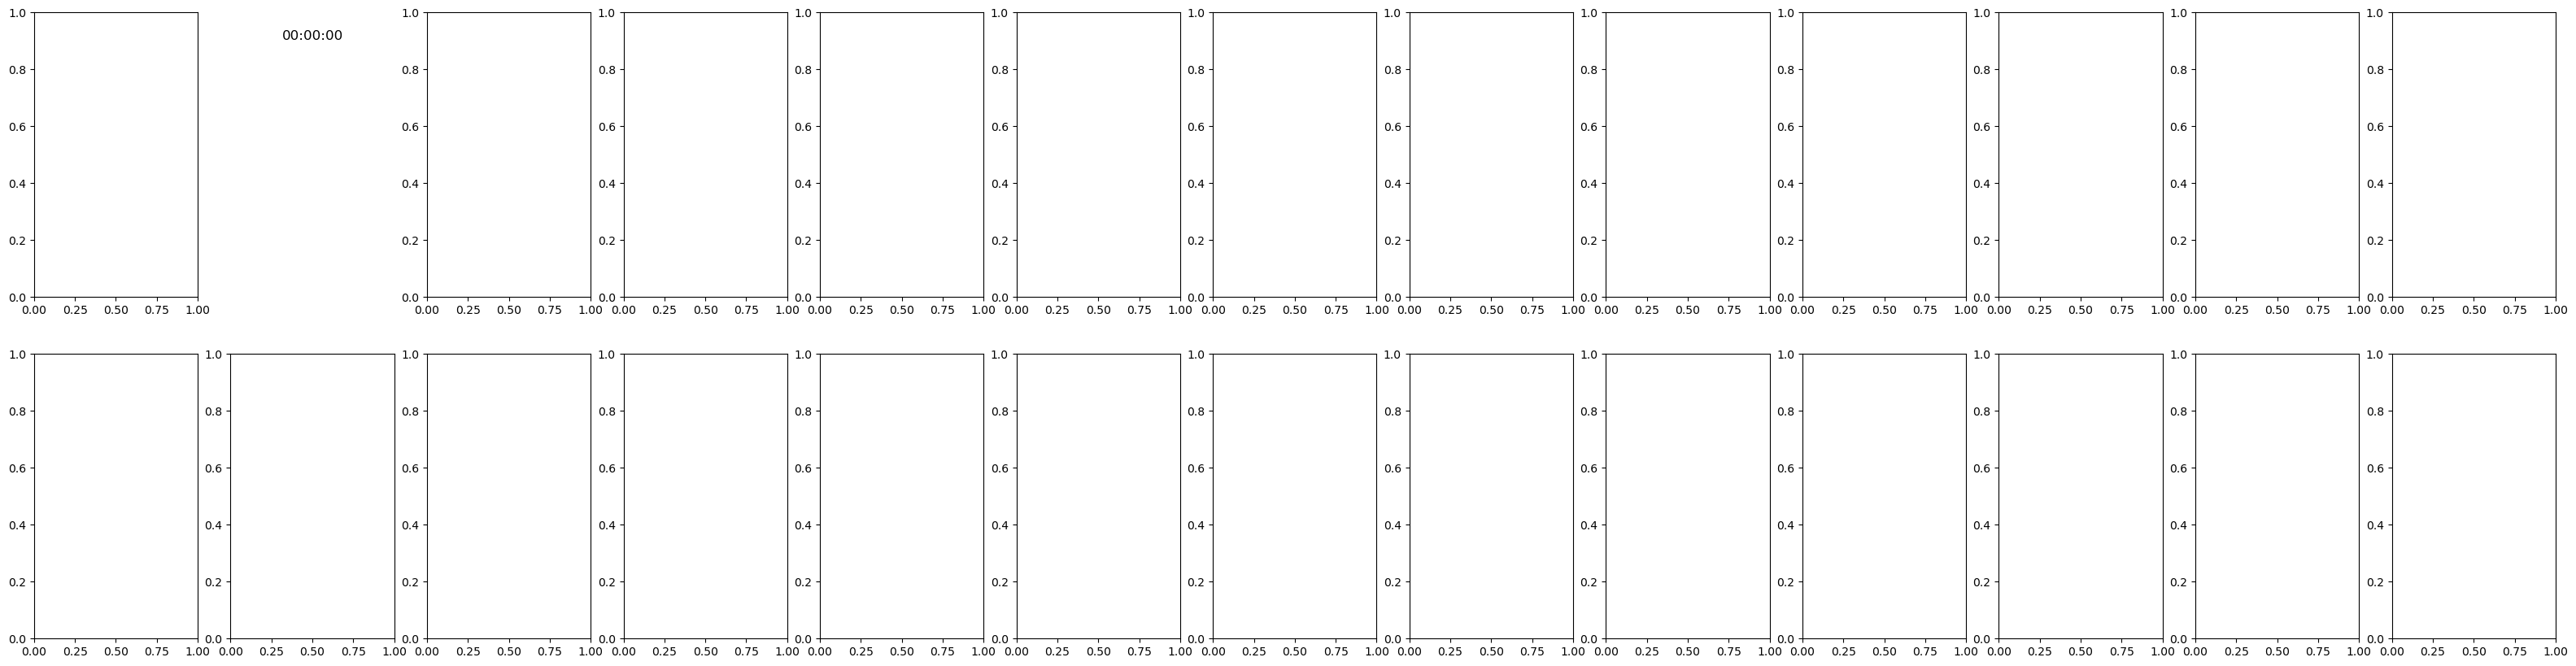

In [108]:
import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cmap = 'viridis'
# day = 18

target_county = 'New York, NY'
target_county = 'Centre, PA'
target_county = 'Richland, SC'
target_county = 'Lexington, SC'
target_county = 'Union, NJ'
target_county = 'Fairfax, VA'
target_county = 'Los Angeles, CA'
target_county = 'Cook, IL'
target_county = 'Harris, TX'
target_county = 'Maricopa, AZ'
target_county = 'San Diego, CA'
target_county = 'Orange, CA'
target_county = 'Miami-Dade, FL'
target_county = 'Dallas, TX'
target_county = 'King, WA'
target_county = 'Riverside, CA'
target_county = 'Hudson, NJ'
target_county = 'Essex, NJ'
target_county = 'Berkshire, MA'


def draw_county_map(target_county):
    target_county = 'New York, NY'
    county_FIPS = county_FIPS_dict[target_county]
    
    target_counties = [county_FIPS] # ['36061']   # 06039
    hourly_population_map_df['county_FIPS'] = hourly_population_map_df.reset_index()['CBG'].astype(str).str[:5].to_list()
    target_hourly_pop_df = hourly_population_map_df[hourly_population_map_df['county_FIPS'].isin(target_counties)]
    
    target_pop_df = ACS_df[ACS_df['county_FIPS'].isin(target_counties)]
    
    
    target_blockgroup_gdf = CBG2019_gdf[CBG2019_gdf['county_FIPS'].isin(target_counties)]
    target_blockgroup_gdf
    
    row_cnt = 2
    col_cnt = 13
    # vmax = max(target_hourly_pop_df.iloc[:, :hour_cnt].max(axis=1).max(), target_pop_df['totalpopulation'].max())
    # vmax = target_hourly_pop_df.iloc[:, :hour_cnt ].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt].mean(axis=1).std() * 3
    # print("target_hourly_pop_df:\n", target_hourly_pop_df.iloc[:, 1: hour_cnt + 1].mean(axis=1).mean())
    # print(target_hourly_pop_df)
    
    vmax = target_hourly_pop_df.iloc[:, : hour_cnt].mean(axis=1).mean() + target_hourly_pop_df.iloc[:, :hour_cnt ].mean(axis=1).std() * 3
    
    print("vmax: ", vmax)
    fig, axs = plt.subplots(figsize=(40, 10), nrows=row_cnt, ncols=col_cnt)
    
    # draw hourly map
    used_ax_cnt = 0
    hour_24_pop = []
    for row in range(row_cnt):
        for col in range(1, col_cnt, 1):
            # if used_ax_cnt == 24:
            #     continue
            merged_gdf = target_blockgroup_gdf.merge(target_hourly_pop_df, left_on='CBG', right_on='CBG')
            hour = used_ax_cnt
            ax=axs[row, col]
            ax.axis('off')
            ax.set_title(f"{hour:02}:00:00")
            hour_column = f'hour_{hour + 1 + 24*(day - 1)}'
            merged_gdf.plot(column=hour_column, ax=ax, vmax=vmax, cmap=cmap)  # , vmax=vmax ,  legend=True
            # merged_gdf.plot(column=hour_column, ax=ax, cmap=cmap)
            hour_24_pop.append(target_hourly_pop_df[hour_column].sum())
            used_ax_cnt += 1
    
    ax=axs[0, 0]
    ax.axis('off')
    ax.set_title(f"ACS 2019 Population")
    merged_gdf = target_blockgroup_gdf.merge(target_pop_df, left_on='CBG', right_on='CBG_FIPS')
    # merged_gdf.plot(column='totalpopulation', ax=ax,  cmap=cmap) # , vmax=vmax ,  legend=True
    merged_gdf.plot(column='totalpopulation', ax=ax, vmax=vmax, cmap=cmap)
    
    # draw county-level population
    ax=axs[1, 0]
    # ax.axis('off')
    ax.set_title('County hourly population')
    ax.set_ylabel('Population')
    ax.set_xlabel('Hour')
    ax.plot(hour_24_pop, label='hourly population')
    ax.axhline(merged_gdf['totalpopulation'].sum(), color='red', label='ACS population')
    ax.legend()
    
     
    fig.suptitle(f"Hourly population of county {target_county}: {year}-{month:02}-{day:02}", fontsize=24, y=1)
    
    
    # Add colorbar axes at the bottom and align it with the left and right of the subplots
    pos1 = axs[0, 0].get_position() # get the original position for first axis
    pos2 = axs[-1, -1].get_position()
    cax = fig.add_axes([pos1.x0 * 1.01, 0, (pos2.x1 - pos1.x0) * 0.99, 0.008])    # [left, bottom, width, height]  # bottom
    value_max =vmax
    value_min = 0
    
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=value_min, vmax=value_max))
    sm._A = []
    # plt.colorbar(sm, cax=cax, label="Bias")
    cbar = plt.colorbar(sm, cax=cax, orientation='horizontal')
    
    for t in cbar.ax.get_xticklabels():
        t.set_fontsize(16)
    
    cbar.set_label('Population', labelpad=-80,   rotation=0, fontsize=24, loc='center')
    
    png_name = os.path.join(save_dir, f"{target_county.replace(', ', '_')}_hourly_population_{year}{month:02}{day:02}_v4.png")
    
    print("PNG name:", png_name)
    
    plt.savefig(png_name, dpi=300, bbox_inches='tight', pad_inches=0.2)
    plt.close()

for target_county, FIPS in tqdm(county_FIPS_dict.items()):
    print(target_county)
    for day in range(1, 32):
        draw_county_map(target_county)
    break

print("Done")

In [ ]:
STOP

In [ ]:
len(np.unique(rows)), len(np.unique(cols))

In [ ]:
(hourly_popu_df[column_name] < 0).sum()

In [ ]:
(hourly_popu_df.iloc[:, 16] < 136).sum()

In [ ]:
import matplotlib.pyplot as plt
plt.plot((hourly_popu_df < 0).sum())

In [ ]:
column_name

688 / 24

In [ ]:
monthly_out_dist_df
hourly_popu_df

In [ ]:
hourly_popu_df.iloc[:, col]

In [ ]:
new_hourly_popu_arr[:, col]

In [ ]:
monthly_out_dist_df['adj_popu'].sum()
hourly_popu_df.iloc[monthly_out_dist_df['row'], col]

In [ ]:
new_hourly_popu_arr[monthly_out_dist_df['row'], col] - hourly_popu_df.iloc[monthly_out_dist_df['row'], col]

In [ ]:
# monthly_out_dist_df['adj_popu'].sum()
monthly_out_dist_df
monthly_out_dist_df.merge(hourly_popu_df[['row']].reset_index(), left_on="destination", right_on="CBG")

In [ ]:
monthly_out_dist_df
hourly_popu_df['row'] = hourly_popu_df.reset_index().index
hourly_popu_df#.reset_index().set_index("CBG")

In [ ]:
hourly_popu_df['row'] = hourly_popu_df.reset_index().index
CBG_to_row_dict = hourly_popu_df['row'].to_dict()

In [ ]:
monthly_out_dist_df
new_hourly_popu_df.iloc[row, col]

In [ ]:
monthly_out_dist_df['adj_popu'].sum()
monthly_out_dist_df

In [ ]:
hourly_popu_df

In [ ]:
monthly_out_dist_df['adj_popu'].sum(), monthly_in_dist_df['adj_popu'].sum()
monthly_out_dist_df.index

(hourly_popu_df.loc[monthly_out_dist_df.index, column_name] + monthly_out_dist_df['adj_popu']).sum()  hourly_popu_df.loc[monthly_out_dist_df.index, column_name].sum()

In [ ]:
hourly_popu_df.loc[monthly_out_dist_df.index, column_name].sum(), new_hourly_popu_df.loc[monthly_out_dist_df.index, column_name].sum(), new_hourly_popu_df.loc[monthly_out_dist_df.index, column_name].sum() -  monthly_out_dist_df['adj_popu'].sum(), 

In [ ]:
monthly_in_dist_df['adj_popu'].sum()
hourly_popu_df.loc[monthly_out_dist_df.index, column_name] 

In [ ]:
hourly_popu_df.iloc[:, 8].sum()

In [ ]:
inbound_df.loc[monthly_in_dist_df.index, column_name]

hourly_popu_df

In [ ]:
monthly_out_dist_df

In [ ]:
monthly_in_dist_df
# inbound_df.loc[monthly_in_dist_df.index, column_name] + monthly_in_dist_df['adj_popu']
# monthly_in_dist_df['stop_weight'].sum()

In [ ]:
inbound_df.loc[monthly_in_dist_df['origin'], column_name] += monthly_in_dist_df['adj_popu']
inbound_df

In [ ]:
outbound.loc[monthly_out_dist_df['origin'], column_name] -= monthly_in_dist_df['adj_popu']


In [ ]:
monthly_in_dist_df['adj_popu'] = target_inbound  * monthly_in_dist_df['stop_weight'] 
print("sum of adj_popu:", monthly_in_dist_df['adj_popu'].sum())
print("target_inbound:", target_inbound)

monthly_in_dist_df

In [ ]:
column_name = hourly_popu_df.columns[col]
print("column_name:", column_name)
inbound_df.loc[monthly_in_dist_df['origin'], column_name] += monthly_in_dist_df.rename(columns={'origin': "CBG"}).set_index('CBG')['adj_popu']
inbound_df#.loc[monthly_in_dist_df['origin'], column_name]

In [ ]:
inbound_df.loc['010010205002'][8]
monthly_in_dist_df['adj_popu']
inbound_df.loc[monthly_in_dist_df['origin'], column_name]  
monthly_in_dist_df.rename(columns={'origin': "CBG"}).set_index('CBG')['adj_popu']
inbound_df.loc[monthly_in_dist_df['origin'], column_name]  + monthly_in_dist_df.rename(columns={'origin': "CBG"}).set_index('CBG')['adj_popu']

In [ ]:
inbound_df.loc[monthly_in_dist_df['origin'], column_name] = inbound_df.loc[monthly_in_dist_df['origin'], column_name]  - 1

In [ ]:
monthly_in_dist_df
# monthly_in_dist_df['stop'].sum()

In [ ]:
device_home_areas_df

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

employment_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\employment_ACS2019.csv"

employment_df = pd.read_csv(employment_fname)

employment_df

In [ ]:
employment_df['employ_rate'] = employment_df['Population 16 Years and Over: in Labor Force: Civilian: Employed'] / employment_df['Population 16 Years and Over: in Labor Force']
employment_df['employ_rate'].describe()

In [ ]:
for c in employment_df.columns:
    print(c)

# Sum the dictionary columns

In [ ]:
%load_ext autoreload
%autoreload 2
import os
import random
import sqlite3 
import numpy as np
import json
import math
from tqdm.notebook import tqdm
from tqdm import tqdm
import calendar

tqdm.pandas()

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import Advan_operator as ad_op  

pd.set_option('display.max_columns', None)

import logging
# Create a logger
logger_name = 'all_logger'
logger = logging.getLogger(logger_name)

In [ ]:
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo

#  #### Dell desktop
save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor'   
data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'    # Dell
ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
##  home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
home_panel_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"

# home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The`1

# data_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Dell 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Dell
# ACS_file = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# data_dir = r'F:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'   # Lenovo 
# save_dir = r'D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test'  # Lenovo
# ACS_file = r"F:\Research\Wild_fire\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# home_panel_fname = f"F:\SafeGraph\Advan_2023_API\Monthly_Patterns_home_panel_summary\Monthly_Patterns_home_panel_summary_2019_2023.csv"
# CBG_2019_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"

# # 2018 desktop
# save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2024_home_panel_dell_add_stop_factor'   
# # save_dir = r'E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\hourly_map_test_2023_home_panel'  # 2018 desktop
# # # data_dir = r'D:\SafeGraph\Advan_2023_API\Neighborhood_Patterns'  
# data_dir = r'\\HWW\SafeGraph\Advan_2023_API\Neighborhood_Patterns'    # 2018
# # data_dir = r'D:\SafeGraph\Advan_2024_API\Neighborhood_Patterns'    
# ACS_file = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_data\Safegraph_bias\cbg_acs_2019_county_tract_new20230929_cleaned.csv"
# # home_panel_fname = f"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\Monthly_Patterns_home_panel_summary_2019_2023.zip"
# home_panel_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\home_panel_summary_2019_2023_restated_20240119.csv.gz"  ## large change!!!
# # # https://community.deweydata.io/t/residing-device-count-in-2023-07-and-2023-08-surged-abnomorally/26675/15
# CBG_2019_fname = r"E:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\blockgoups2019.zip"


save_file = False

year = '2022'
month = 9

stops_per_device = 2 # stops per device per day

_, num_days = calendar.monthrange(int(year), month)
print(f"Days in {year}-{month:02d}:", num_days)


os.makedirs(save_dir, exist_ok=True)


month_dir = os.path.join(data_dir, str(year), f'{month:02}', '01')
no_dict_colum_fname = os.path.join(save_dir, f"NP_dict_column_{year}_{month:02}.csv")
device_home_areas_fname = os.path.join(save_dir, f"NP_split_device_home_areas_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_CBG_fname     = os.path.join(save_dir, f"adjusted_dwelling_time_stop_CBG_{year}_{month:02}.csv")
adjusted_dwelling_time_stop_natinol_fname = os.path.join(save_dir, f"adjusted_dwelling_time_stop_natinol_{year}_{month:02}.csv")
person_per_device_fname = os.path.join(save_dir, f"person_per_device_{year}_{month:02}.csv")
restored_CBG_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_CBG_{year}_{month:02}.csv")
restored_target_hourly_vistor_count_fname = os.path.join(save_dir, f"restored_hourly_vistor_count_target_{year}_{month:02}.csv")
CBG_device_stop_destination_distribution_fname  = os.path.join(save_dir, f"CBG_device_stop_destination_distribution_{year}_{month:02}.csv")
CBG_device_stop_origin_distribution_fname = os.path.join(save_dir, f"CBG_device_stop_origin_distribution_{year}_{month:02}.csv")
IPF_results_fname = os.path.join(save_dir, f"IPF_origin_outgoer_hourly_{year}{month:02}.csv")
CBG_hourly_population_fname = os.path.join(save_dir, f"CBG_population_hourly_{year}{month:02}.csv")

CBG_origin_outbound_distribution_sampling_rate_fname = os.path.join(save_dir, f"CBG_origin_outbound_distribution_sampling_rate_{year}{month:02}.csv")
CBG_destination_inbound_per_device_fname = os.path.join(save_dir, f"CBG_destination_inbound_per_device_{year}{month:02}.csv")

CBG_destination_inbound_fname = os.path.join(save_dir, f"CBG_destination_inbound_{year}{month:02}.csv")
inbound_hourly_df_fname = os.path.join(save_dir, f"inbound_hourly_{year}{month:02}.csv")
CBG_agregated_inbound_fname =  os.path.join(save_dir, f"CBG_agregated_inbound_{year}{month:02}.csv")
hourly_agregated_inbound_fname =  os.path.join(save_dir, f"hourly_agregated_inbound_{year}{month:02}.csv")

 
# month_dir = r'K:\SafeGraph\Advan_2023_API\Neighborhood_Patterns\2023\06\01'
# CBG_list_fname = r"D:\OneDrive_PSU\OneDrive - The Pennsylvania State University\Research_doc\Wild_fire\ACS_2019_CBG_list.csv"

# sqlite_fname = r'F:\Research\Wild_fire\Neighborhood_202306.db'

  
print("Month directory:", month_dir)
print("Save_dir directory:", save_dir)
print("ACS_file:", ACS_file)
print("home_panel file name:", home_panel_fname)

print("No dict colum file name:", no_dict_colum_fname)
print("Device home areas file name:", device_home_areas_fname)
print("Device person_per_device file name:", person_per_device_fname)


print("Device adjusted_dwelling_time_stop_CBG_fname:", adjusted_dwelling_time_stop_CBG_fname)
print("Device adjusted_dwelling_time_stop_natinol_fname:", adjusted_dwelling_time_stop_natinol_fname)

print("Restored_hourly_vistor_count_CBG file name:   ", restored_CBG_hourly_vistor_count_fname)
print("Restored_hourly_vistor_count_target file name:", restored_target_hourly_vistor_count_fname)

print("CBG_device_stop_destination_distribution file name:   ", CBG_device_stop_destination_distribution_fname)
print("CBG_device_stop_origin_distribution file name:", CBG_device_stop_origin_distribution_fname)

print("IPF_results file name:", IPF_results_fname)
print("CBG hourly population file name:", CBG_hourly_population_fname)

print("CBG_origin_outbound_distribution_sampling_rate file name:", CBG_origin_outbound_distribution_sampling_rate_fname)


In [ ]:
use_cols =  ['AREA', 
             "DEVICE_HOME_AREAS",
            "STOPS_BY_DAY", 
            "RAW_STOP_COUNTS", 
            "RAW_DEVICE_COUNTS", 
            "MEDIAN_DWELL", 
            "STOPS_BY_EACH_HOUR", 
             # 'work_behavior_device_home_areas',
             "WORK_BEHAVIOR_DEVICE_HOME_AREAS",
           
            ]
# month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], start_str="data", use_cols=use_cols, verbose=True)
month_df = ad_op.load_neighborhood_monthly_folder(folder=month_dir, extions=['gz'], start_str="N", verbose=True)

# assume a device has trips_per_device (e.g., 2) stop per day !!!!!!!!!!!!!!!!!!!!!!!!!!
month_df['assumed_stops'] = month_df['RAW_DEVICE_COUNTS'].astype(int) * stops_per_device * num_days
 
month_df = month_df.sort_values("AREA")
month_df['AREA'] = month_df['AREA'].astype(str).str.zfill(12)
# month_df = month_df[use_cols + ['assumed_stops']]
month_df

In [ ]:
dict_columns = ['DEVICE_HOME_AREAS', 'WEEKDAY_DEVICE_HOME_AREAS', 'WEEKEND_DEVICE_HOME_AREAS', 'BREAKFAST_DEVICE_HOME_AREAS', 'LUNCH_DEVICE_HOME_AREAS', 'DINNER_DEVICE_HOME_AREAS', 'NIGHTLIFE_DEVICE_HOME_AREAS', 'WORK_HOURS_DEVICE_HOME_AREAS', 'WORK_BEHAVIOR_DEVICE_HOME_AREAS', 'DEVICE_DAYTIME_AREAS', 'DEVICE_TYPE']
list_columns = ['STOPS_BY_DAY', 'STOPS_BY_EACH_HOUR', 'POPULARITY_BY_EACH_HOUR', 'POPULARITY_BY_HOUR_MONDAY', 'POPULARITY_BY_HOUR_TUESDAY', 'POPULARITY_BY_HOUR_WEDNESDAY', 'POPULARITY_BY_HOUR_THURSDAY', 'POPULARITY_BY_HOUR_FRIDAY', 'POPULARITY_BY_HOUR_SATURDAY', 'POPULARITY_BY_HOUR_SUNDAY']
value_columns = ['RAW_STOP_COUNTS', 'RAW_DEVICE_COUNTS', 'DISTANCE_FROM_HOME', 'DISTANCE_FROM_PRIMARY_DAYTIME_LOCATION', 'MEDIAN_DWELL']

In [ ]:
def _get_total_of_dict_value(row, col_name):
    # print(row)
    dict = json.loads(row[col_name])
    total = sum(dict.values())
    return total

def _get_sum_of_list_column(row, col_name):
    # print(row)
    _list = json.loads(row[col_name])
    total = sum(_list)
    return total

def aggre_columns(month_df):
    df = pd.DataFrame()
    df['AREA'] = month_df['AREA']

    for idx, c in enumerate(value_columns):
        print(f"Processing single value column: {c}, {idx + 1} / {len(value_columns)}")
        df[f"{c}"] = month_df[c]
        
        
    for idx, c in enumerate(dict_columns):
        print(f"Processing diction column: {c}, {idx + 1} / {len(dict_columns)}")
        results = month_df.iloc[:].apply(_get_total_of_dict_value, args=(c, ), axis=1)
        df[c] = results
    

    for idx, c in enumerate(list_columns):
        print(f"Processing list column: {c}, {idx + 1} / {len(list_columns)}")
        df[f"{c}_sum"] = month_df.apply(_get_sum_of_list_column, args=(c, ), axis=1)
        # df[f"{c}_median"] = month_df[c].median()

    return df
    

aggre_df = aggre_columns(month_df.iloc[:])
aggre_df

In [ ]:
month_df